Altitude = 120 m
Estimated scale parameter (σ): 9.522068836330757
Estimated location parameter (k): 0
Arithmetic Mean = 11.6291 m/s
Expected Value = 11.9341 m/s
Alpha = 13.4662 m/s
Standard Deviation from Soot = 6.2383
Ve50 = 51.7738 m/s
Turbulence Intensity = 0.5364
Class = unspecified
Sub-class = unspecified


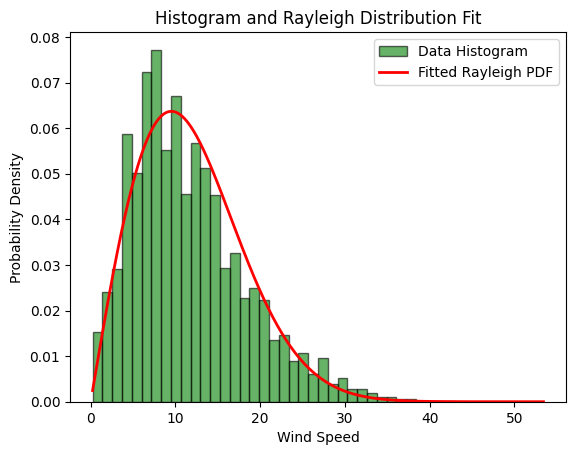

In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import weibull_min, kstest, rayleigh

# For CSV files
#csv_file_path = 'path_to_your_file.csv'
df = pd.read_csv('WindSpeed.csv')
wind_speed_matrix = df.values
# Assuming 'wind_speed_matrix' is your 2D array of wind speed data
data = wind_speed_matrix.flatten()
data = data[~np.isnan(data)]
    

    
def Rayleigh_fit(Altitude, bin, n):
    print(f"Altitude = {Altitude} m")
    data_convert = data*(40/Altitude)**(-1/n)
    data_convert = data_convert[data_convert > 0]
    data_convert.sort()
    
    param = rayleigh.fit(data_convert, floc=0)
    loc, sigma = param[0], param[1]
    print(f"Estimated scale parameter (σ): {sigma}")
    print(f"Estimated location parameter (k): {loc}")
    dumb_mean = data_convert.mean()
    expected_val = sigma*math.sqrt(math.pi/2)
    print(f"Arithmetic Mean = {dumb_mean:.4f} m/s")
    print(f"Expected Value = {expected_val:.4f} m/s")
    alpha = sigma*math.sqrt(2)
    print(f"Alpha = {alpha:.4f} m/s")
    stdev_soot = math.sqrt((4-math.pi)/math.pi)*expected_val
    print(f"Standard Deviation from Soot = {stdev_soot:.4f}")
    
    ve50_prop = 3.805e-7
    x = sym.symbols('x')
    eqn = -1 + ve50_prop + 1 - sym.exp(-(math.sqrt(math.pi)*x/2/expected_val)**2)
    ve50 = sym.nsolve(eqn,x,30)
    print(f"Ve50 = {ve50:.4f} m/s")
    class0 = 'unspecified'
    subclass0 = 'unspecified'
    
    intensity = stdev_soot/dumb_mean
    print(f"Turbulence Intensity = {intensity:.4f}")
    
    if ve50 > 50:
        class0 = 'unspecified'
    elif ve50 > 42.5:
        class0 = 'I'
    elif ve50 > 37.5:
        class0 = 'II'
    else:
        class0 = 'III'
    
    if intensity > 0.16:
        subclass0 = 'unspecified'
    elif intensity > 0.14:
        subclass0 = 'A'
    elif intensity > 0.12:
        subclass0 = 'B'
    else:
        subclass0 = 'C'
    
    print(f"Class = {class0}")
    print(f"Sub-class = {subclass0}")
    
    # Step 8: Plot the fitted Rayleigh PDF
    x = np.linspace(data_convert.min(), data_convert.max(), 1000)
    pdf_rayleigh = rayleigh.pdf(x, loc=0, scale=sigma)
    plt.hist(data_convert, bins=bin, density=True, alpha=0.6, color='g',edgecolor='k',linewidth=1, label='Data Histogram')
    plt.plot(x, pdf_rayleigh, 'r-', linewidth=2, label='Fitted Rayleigh PDF')
    
    # Final touches
    plt.xlabel('Wind Speed')
    plt.ylabel('Probability Density')
    plt.title('Histogram and Rayleigh Distribution Fit')
    plt.legend()
    plt.show()
    
#Rayleigh_fit(Altitude = 122, bin = 20, n = 7) #Selected V120-2.2 MW IEC IIB/IEC S
#Rayleigh_fit(Altitude = 117, bin = 20, n = 7) #Selected V126-3.45 MW IEC IIB/ IEC IIA
#Rayleigh_fit(Altitude = 126, bin = 20, n = 7) #Selected V163-4.5 MW IEC IIIB
#Rayleigh_fit(Altitude = 91.5, bin = 20, n = 7) #Selected V117-4.2 MW IEC IB-T / IEC IIA-T / IEC S-T
bin_width = 1
bin0 = round(max(data)/bin_width)
Rayleigh_fit(Altitude = 120, bin = bin0, n = 7)

